#**Unemployment Analysis With Python**

#**Task To Be Done**

This Task is assigned by: CodeAlpha. Which is a leading software develpoment company

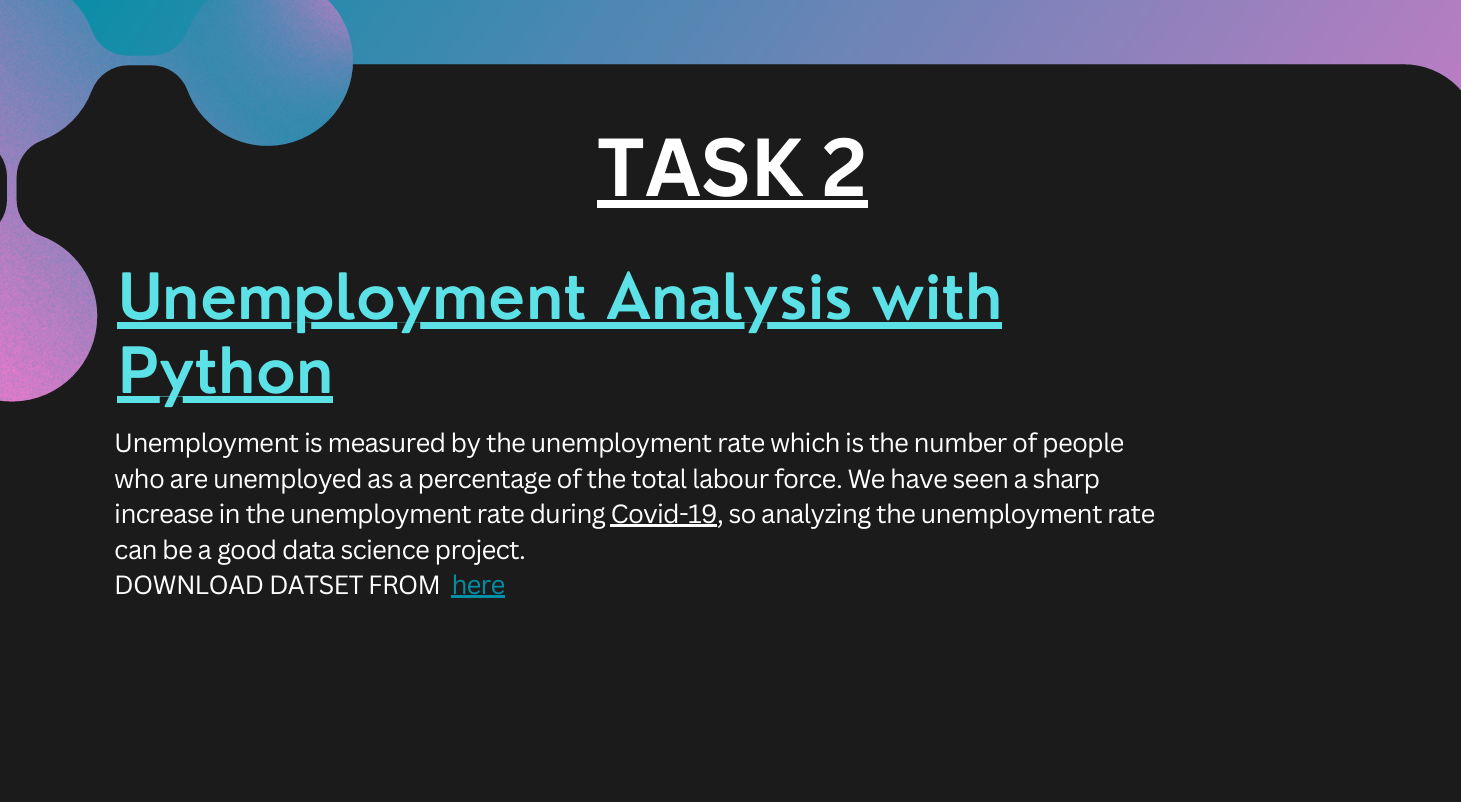

# **Project Objective & Dataset Overview**

The goal of this analysis is to evaluate the impact of the COVID-19 pandemic on India's job market. The dataset we’re using provides valuable information on unemployment rates across different states in India. It includes the following key indicators:

- **State**: The name of each Indian state or region.
- **Date**: The date of each record, helping us analyze trends over time.
- **Measuring Frequency**: The frequency at which the data was collected.
- **Estimated Unemployment Rate (%)**: The percentage of unemployed individuals within the labor force.
- **Estimated Employed Individuals**: An estimate of the total number of employed people.
- **Estimated Labour Participation Rate (%)**: The percentage of people in the labor force relative to the working-age population.

By analyzing these indicators, we aim to uncover trends, regional differences, and the specific impact COVID-19 had on employment in India.

# **Importing Libraries**


In [2]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
import calendar
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Downloading The Dataset**

In [3]:
!pip install Kaggle
!pip install opendatasets

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: naglaareda
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india


100%|██████████| 16.0k/16.0k [00:00<00:00, 5.41MB/s]

# **Loading the Data**

In [5]:
# Load the 'accident cleaned data.csv' dataset
df =  pd.read_csv('/content/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

# Check the first few rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# **Cleaning & EDA**

In [7]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
# Check for missing values
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [9]:
# Check for duplicate values
df.duplicated().sum()

0

In [10]:
print(df.shape)

(267, 9)


In [12]:
# Updating Columns Names
df.columns = ['state','date','frequency','estimated_unemployment_rate','estimated_employed','estimated_labour_participation rate','region','longitude','latitude']
df.columns


Index(['state', 'date', 'frequency', 'estimated_unemployment_rate',
       'estimated_employed', 'estimated_labour_participation rate', 'region',
       'longitude', 'latitude'],
      dtype='object')

In [13]:
# Converting 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.dtypes

,0
state,object
date,datetime64[ns]
frequency,object
estimated_unemployment_rate,float64
estimated_employed,int64
estimated_labour_participation rate,float64
region,object
longitude,float64
latitude,float64


In [14]:
# Display stats about the data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,267,2020-06-16 09:15:30.337078528,2020-01-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-08-31 00:00:00,2020-10-31 00:00:00,NaN
estimated_unemployment_rate,267.0,12.236929,0.5,4.845,9.65,16.755,75.85,10.803283
estimated_employed,267.0,13962105.722846,117542.0,2838930.5,9732417.0,21878686.0,59433759.0,13366318.359733
estimated_labour_participation rate,267.0,41.681573,16.77,37.265,40.39,44.055,69.69,7.845419
longitude,267.0,22.826048,10.8505,18.1124,23.6102,27.2784,33.7782,6.270731
latitude,267.0,80.532425,71.1924,76.0856,79.0193,85.2799,92.9376,5.831738


In [15]:
# Extracting month from 'date' and creating a 'month' column
df['month_int'] = df['date'].dt.month

# Mapping integer month values to abbreviated month names
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping 'month_int' column
# df.drop(columns='month_int', inplace=True)

df.head(3)

,state,date,frequency,estimated_unemployment_rate,estimated_employed,estimated_labour_participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


In [16]:
df.state.value_counts()

,count
state,
Andhra Pradesh,10
Assam,10
Uttarakhand,10
Uttar Pradesh,10
Tripura,10
Telangana,10
Tamil Nadu,10
Rajasthan,10
Punjab,10


In [17]:
df.region.value_counts()

,count
region,
North,79
South,60
West,50
East,40
Northeast,38


In [18]:
df.frequency.value_counts()

,count
frequency,
M,267


In [19]:
# Converting 'frequency' and 'region' columns to categorical data type
df['frequency'] = df['frequency'].astype('category')
df['region'] = df['region'].astype('category')
df.dtypes

,0
state,object
date,datetime64[ns]
frequency,category
estimated_unemployment_rate,float64
estimated_employed,int64
estimated_labour_participation rate,float64
region,category
longitude,float64
latitude,float64
month_int,int32


<Axes: >

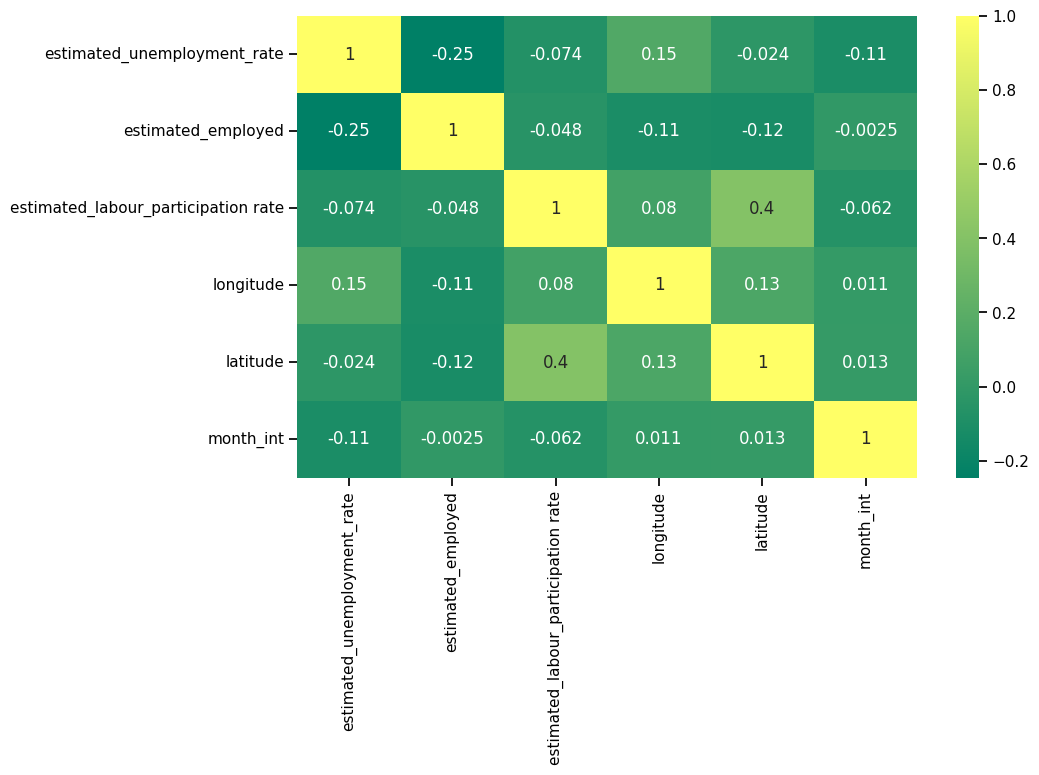

In [20]:
# Correlation Heatmap
heat_map = df[['estimated_unemployment_rate', 'estimated_employed', 'estimated_labour_participation rate', 'longitude', 'latitude', 'month_int']]
heat_map = heat_map.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_map, annot=True, cmap='summer')

In [21]:
# Box plot of Unemployment Rate by State
fig = px.box(df, x='state', y='estimated_unemployment_rate', color='state', title='Unemployment rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

The box plot displays the distribution of the estimated unemployment rate across various Indian states, highlighting the variability and median rates within each state. Here are some observations:

- Median Unemployment Rate:
Each box represents the interquartile range (IQR), with the line in the middle showing the median unemployment rate for each state. States with higher median values, like Haryana and Delhi, indicate relatively higher average unemployment rates compared to other states.
Variability and Outliers:

- The height of each box and the presence of whiskers show the range of unemployment rates within each state.
States like Haryana, Delhi, and Bihar show a wider IQR, suggesting greater variability in unemployment rates over time.
There are several outliers, especially in states like Haryana and Bihar, where unemployment rates occasionally reach above 50%, indicating periodic spikes in unemployment that deviate from the general trend.

- Comparison Across States:
States like Meghalaya, Maharashtra, and Karnataka show relatively low unemployment rates with less variability, as indicated by shorter boxes and lower medians.
Conversely, states with larger boxes or whiskers, like Haryana and Jharkhand, have a wider distribution of unemployment rates, possibly due to economic fluctuations or seasonal employment changes.

- Ordering by Median:
The states are ordered in descending order of their median unemployment rate, making it easy to see which states tend to have higher or lower unemployment rates on average.


# **Visuals**

In [22]:
# Scatter matrix
fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['estimated_unemployment_rate', 'estimated_employed', 'estimated_labour_participation rate'],
                        color='region')
fig.show()

In [23]:
# Bar Plot showing the average unemployment rate in each state
plot_unemp = df[['estimated_unemployment_rate','state']]
df_unemployed = plot_unemp.groupby('state').mean().reset_index()

df_unemployed = df_unemployed.sort_values('estimated_unemployment_rate') # Helps to visually compare the states from the lowest to the highest average unemployment rate

fig = px.bar(df_unemployed, x='state',y='estimated_unemployment_rate',color ='state',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

From the Bar Plot we get that (Haryana),(Tripura),(Jharkhand) were having the highest average amount of unemployment rate while (Meghalaya) was having the lowest average unemployment rate.

In [24]:
# Select data for the period prior to lockdown (January through April)
pre_lockdown = df[(df['month_int'] >= 1) & (df['month_int'] <= 4)]

# Select data during the lockdown phase (April through July)
during_lockdown = df[(df['month_int'] >= 4) & (df['month_int'] <= 7)]

# Compute the average unemployment rate by state for the pre-lockdown period
avg_pre_lock = pre_lockdown.groupby('state')['estimated_unemployment_rate'].mean().reset_index()

# Compute the average unemployment rate by state for the lockdown period
avg_during_lock = during_lockdown.groupby('state')['estimated_unemployment_rate'].mean().reset_index()

# Merge the pre-lockdown and lockdown unemployment rates for comparison
avg_during_lock['Unemployment Rate before lockdown'] = avg_pre_lock['estimated_unemployment_rate']
avg_during_lock.columns = ['state', 'Unemployment Rate before lockdown', 'Unemployment Rate during lockdown']

avg_during_lock.head()


,state,Unemployment Rate before lockdown,Unemployment Rate during lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [26]:
# Calculate the percentage change in unemployment rate after lockdown
avg_during_lock['Percentage Change in Unemployment'] = round(
    (avg_during_lock['Unemployment Rate during lockdown'] - avg_during_lock['Unemployment Rate before lockdown']) /
    avg_during_lock['Unemployment Rate before lockdown'], 2
)

# Sort data by percentage change for visualization
sorted_change = avg_during_lock.sort_values('Percentage Change in Unemployment')

# Plotting the percentage change in unemployment rate by state after lockdown
fig = px.bar(
    sorted_change, x='state', y='Percentage Change in Unemployment',
    color='Percentage Change in Unemployment',
    title='Percentage Change in Unemployment Rate by State After Lockdown',
    template='ggplot2'
)
fig.show()


**Observations**
- Variation Across States: The chart reveals a significant variation in the percentage change in unemployment rates across different states after the lockdown. Some states experienced a notable increase, while others saw a decrease.

- States with Decreased Unemployment: States like Goa, Madhya Pradesh, and Jharkhand show a negative percentage change, indicating that unemployment rates decreased after the lockdown period.

- States with Increased Unemployment: On the other end, states like Sikkim, Jammu & Kashmir, and Tripura exhibit a positive percentage change, meaning unemployment rates rose following the lockdown.

- Neutral or Minimal Change: A few states, such as Odisha and Uttarakhand, exhibit minimal change in unemployment rates, indicating a relative stability during the lockdown period.



In [36]:
# Creating an animated scatter plot on a geographical map to visualize the impact of lockdown on employment by region
fig = px.scatter_geo(df,'longitude', 'latitude', color="region",
                     hover_name="state", size="estimated_unemployment_rate",
                     animation_frame="month",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

# Adjusting the animation speed by setting the duration of each frame
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

# Customizing the map view to focus on the area of interest and highlight the ocean color
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

fig.show()

In [38]:
# Selecting relevant columns for unemployment analysis by region and state
unemployment_data = df[['state', 'region', 'estimated_unemployment_rate', 'estimated_employed', 'estimated_labour_participation rate']]

# Calculating the average unemployment rate by region and state
average_unemployment = unemployment_data.groupby(['region', 'state'])['estimated_unemployment_rate'].mean().reset_index()

# Creating a Sunburst chart to visualize unemployment rate distribution by region and state
fig = px.sunburst(
    average_unemployment, path=['region', 'state'], values='estimated_unemployment_rate',
    color='estimated_unemployment_rate', color_continuous_scale='RdYlBu',
    title='Unemployment Rate Distribution by Region and State', height=550, template='presentation'
)

# Displaying the chart
fig.show()


**Some References**
- https://www.kaggle.com/code/deevikaa/unemployment-analysis-with-python
- https://www.kaggle.com/code/anakha27/unemployment-in-india
- https://www.kaggle.com/code/noormuhammad106/covid-19-unemployment-analysis